In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

from textblob.sentiments import NaiveBayesAnalyzer

import pandas as pd
import sqlite3
from textblob import TextBlob

import seaborn as sns
sns.set(color_codes=True)

# encoding=utf8
import sys
reload(sys)
sys.setdefaultencoding('utf8')

import spacy
nlp = spacy.load('en')

import re

In [4]:
df = pd.read_csv('../pitchfork3.csv')

years = np.arange(1999, 2018)
df_new = df[df['new_album'] == 1]
df_reissue = df[df['new_album'] == 0]

# Basic NLP

## Most Reviews are between 500-800 words long

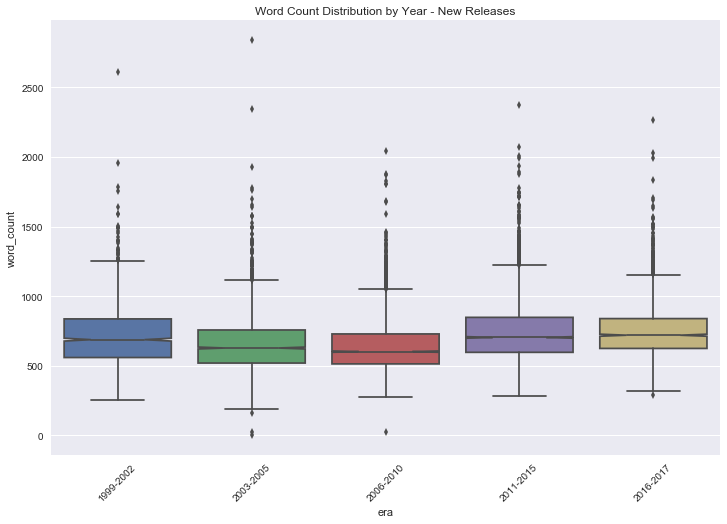

In [5]:
plt.figure(figsize=(12,8))
temp_df = df[df['new_album'] == 1]
sns.boxplot(x=temp_df['era'][::-1], y=temp_df['word_count'], data=temp_df[['word_count', 'era']], notch=True)
plt.title('Word Count Distribution by Year - New Releases')
plt.xticks(rotation=45)
plt.show()

## Reviews have a smaller proportion of adjectives and adverbs.

*The notches represent a 95% confidence interval for the median

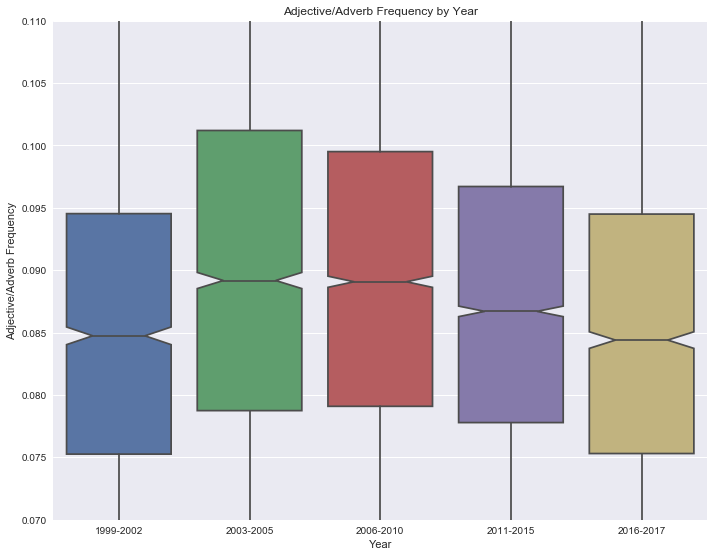

In [10]:
temp_df = df[(df['new_album'] == 1) ]
temp_df['Best New Music'] = np.where(temp_df['best_new_music'] == 1, "Best New Music", "Not Best New Music") 

plt.figure(figsize=(10,8))
plt.title('Abstract Subjectivity by Era', fontsize=20)
sns.boxplot(x=temp_df['era'][::-1], y=temp_df['adj_freq'], 
            data=temp_df[['adj_freq', 'era']], 
#             hue=temp_df['Best New Music'],
           notch=True)
plt.legend(fontsize=20)
plt.tight_layout()
plt.ylim(.07, .11)
plt.xlabel('Year')
plt.ylabel('Adjective/Adverb Frequency')
plt.title('Adjective/Adverb Frequency by Year')
plt.show()

## The Abstract Has Become More Subjective

I'm using TextBlob to measure the polarity and subjectivity of each review. Polarity is a score between [-1, 1] measuring positivity of text, and subjectivity is a score between [0, 1] where scores closer to 1 are more subjective. I ran the sentiment analysis of both the 1-2 sentence abstract preceding each review, as well as the entire review content.

Average subjectivity of review content has gone down slightly year over year. Authors are becoming more objective, using language that is less opinion-based in the content. Yet, interestingly, the abstracts have gotten considerably *more* subjective in recent years. This makes sense -- readers can get a quick glance at Pitchfork's opinion, and then read more if they want to learn more about the album.

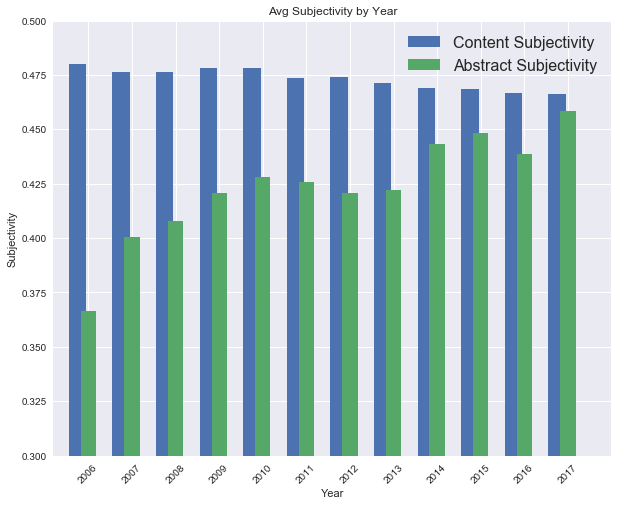

In [11]:
plt.figure(figsize=(10,8))
plt.bar(df['pub_year'].unique()[::-1] - .25, 
        df.groupby('pub_year')['cont_subjectivity'].mean(), 
        width=.4,
        label='Content Subjectivity')
plt.bar(df['pub_year'].unique()[::-1], 
        df.groupby('pub_year')['abs_subjectivity'].mean(),
        width=.35,
        label='Abstract Subjectivity')

plt.xticks(years, rotation=45)
plt.xlim(2005.2, 2018)
plt.xlabel('Year')
plt.ylabel('Subjectivity')
plt.title('Avg Subjectivity by Year')
plt.ylim(.3,.5)
plt.legend(fontsize=16)
plt.show()

### The sentiment divide between Best New Music and regular reviews has gotten smaller.

Between 2006-2015, the abstracts for Best New Music reviews were significantly (and noticeably) more subjective. This could indicate that since the acquisition, Pitchfork is less worried about signalling its opinions about an album in the abstract.

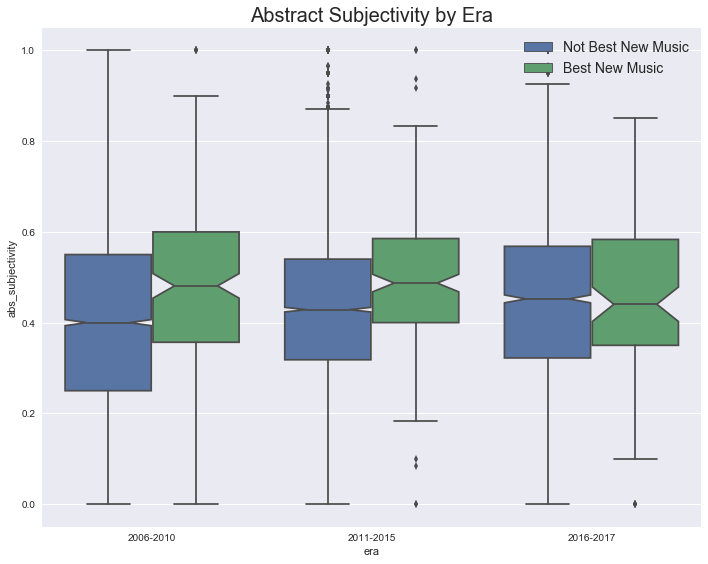

In [25]:
temp_df = df[(df['new_album'] == 1) & (df['era'] != '1999-2002') & (df['era'] != '2003-2005')]
temp_df['Best New Music'] = np.where(temp_df['best_new_music'] == 1, "Best New Music", "Not Best New Music") 
plt.figure(figsize=(10,8))
plt.title('Abstract Subjectivity by Era', fontsize=20)

sns.boxplot(x=temp_df['era'][::-1], y=temp_df['abs_subjectivity'], 
            data=temp_df[['abs_subjectivity', 'era']], 
            hue=temp_df['Best New Music'],
           notch=True)
plt.legend(fontsize=14, loc=1)
plt.tight_layout()

### Abstracts for "Best New Music" albums are not distinguishbly more or less 'positive' than albums that do not receive that designation.

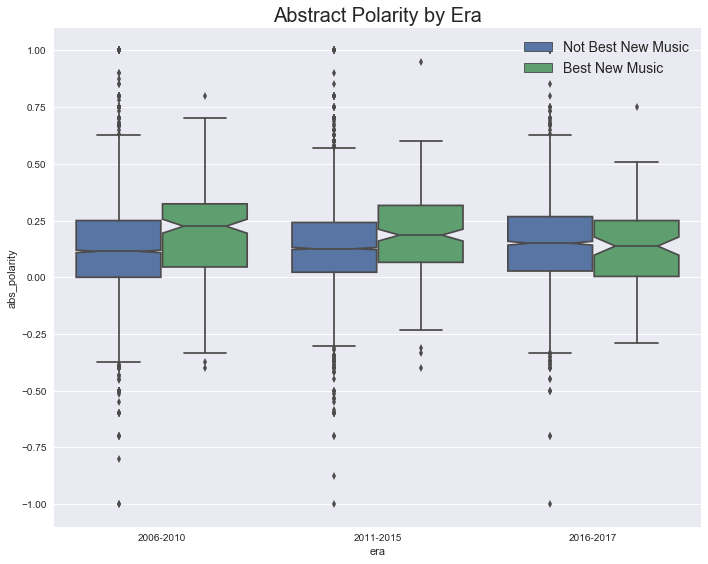

In [15]:
temp_df = df[(df['new_album'] == 1) & (df['era'] != '1999-2002') & (df['era'] != '2003-2005')]
temp_df['Best New Music'] = np.where(temp_df['best_new_music'] == 1, "Best New Music", "Not Best New Music") 

plt.figure(figsize=(10,8))
plt.title('Abstract Polarity by Era', fontsize=20)
sns.boxplot(x=temp_df['era'][::-1], y=temp_df['abs_polarity'], 
            data=temp_df[['abs_polarity', 'era']], 
            hue=temp_df["Best New Music"],
           notch=True)
plt.legend(fontsize=14, loc=1)
plt.tight_layout()

Below is Sentiment Analysis on the Adjectives and Adverbs extracted from the reviews

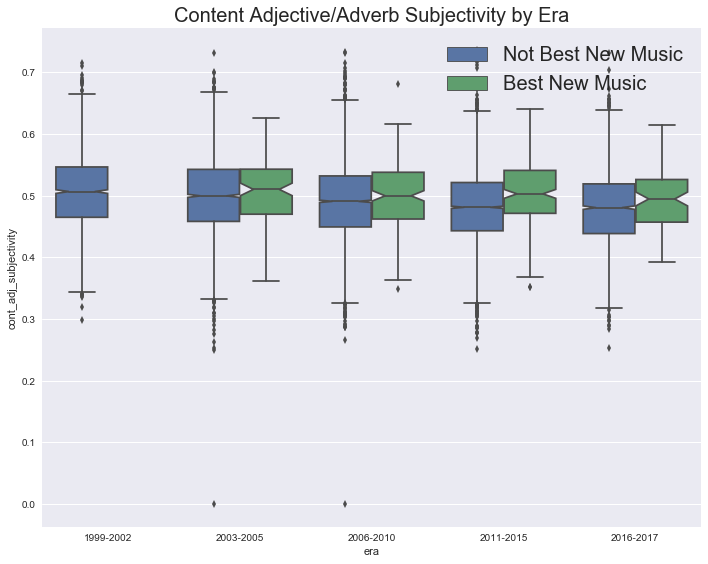

In [16]:
temp_df = df[(df['new_album'] == 1) & (df['era'] != '1: Pre BNM')]
temp_df['Best New Music'] = np.where(temp_df['best_new_music'] == 1, "Best New Music", "Not Best New Music") 

plt.figure(figsize=(10,8))
plt.title('Content Adjective/Adverb Subjectivity by Era', fontsize=20)
sns.boxplot(x=temp_df['era'][::-1], y=temp_df['cont_adj_subjectivity'], 
            data=temp_df[['cont_adj_subjectivity', 'era']], 
            hue=temp_df["Best New Music"],
           notch=True)
plt.legend(fontsize=20, loc=1)
plt.tight_layout()

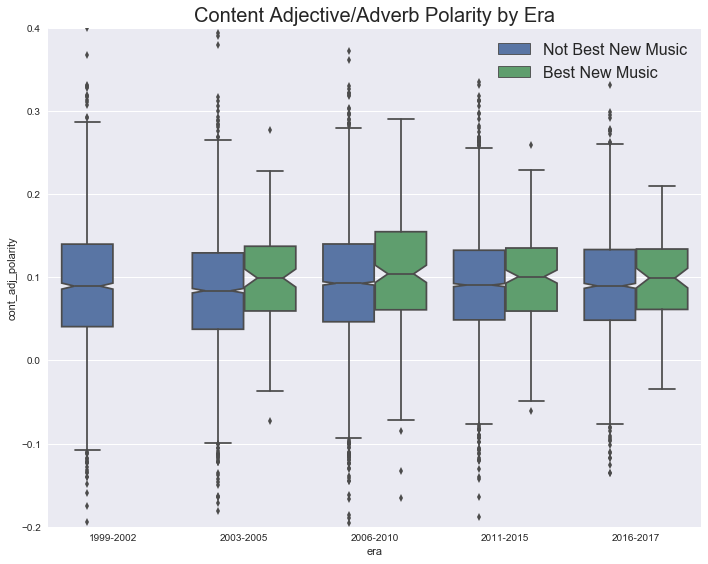

In [18]:
temp_df = df[(df['new_album'] == 1) & (df['era'] != '1: Pre BNM')]
temp_df['Best New Music'] = np.where(temp_df['best_new_music'] == 1, "Best New Music", "Not Best New Music") 

plt.figure(figsize=(10,8))
plt.title('Content Adjective/Adverb Polarity by Era', fontsize=20)
sns.boxplot(x=temp_df['era'][::-1], y=temp_df['cont_adj_polarity'], 
            data=temp_df[['cont_adj_polarity', 'era']], 
            hue=temp_df["Best New Music"],
           notch=True)
plt.ylim(-.2,.4)
plt.legend(fontsize=16, loc=1)
plt.tight_layout()